In [ ]:
!pip install matrixprofile
!pip install ruptures
import pandas as pd

df_down = pd.read_csv('iot_downstairs.csv')[:-150]
df_down['date'] = pd.to_datetime(df_down['date']) 
df_down = df_down.set_index('date')
df_down_bps = [42408,len(df_down)] #defining the breaking piot where change occures

# Matrix Profile Approach

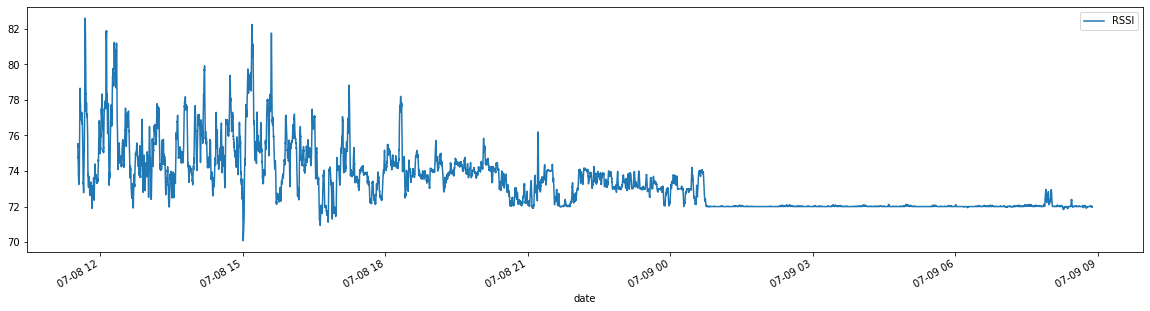

In [ ]:
df_down.rolling(window=50).mean().plot(figsize=(20,5))

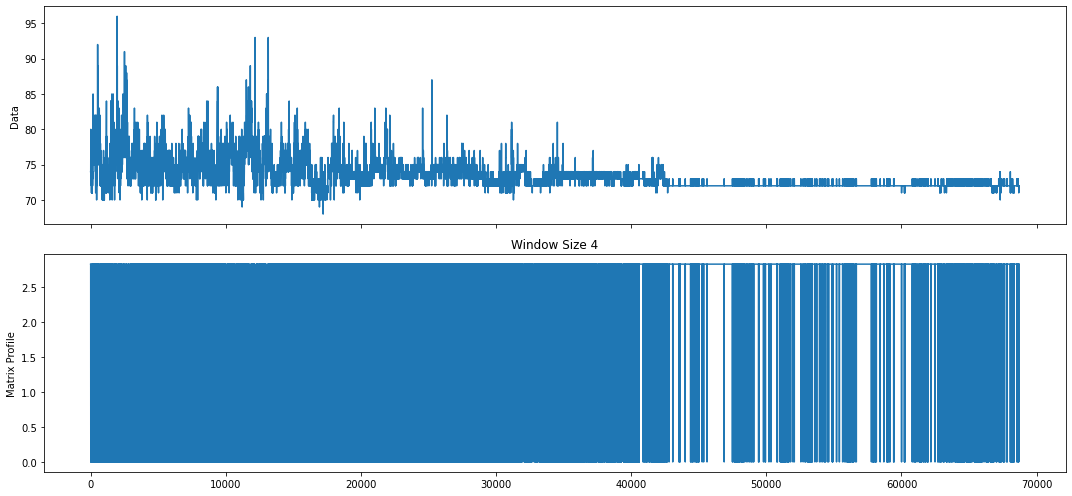

In [ ]:
import matrixprofile as mp
profile = mp.compute(df_down['RSSI'].values, windows=4)
#profile = mp.discover.hierarchical_clusters([df_down['RSSI'].values],window_size=5,t=10)
#profile, figures = mp.analyze(df_down['RSSI'].values)
figures = mp.visualize(profile)


/usr/local/lib/python3.7/dist-packages/matrixprofile/algorithms/regimes.py:81: RuntimeWarning: invalid value encountered in true_divide
  idealized = cross_count / idealized


[<Figure size 1080x504 with 2 Axes>]

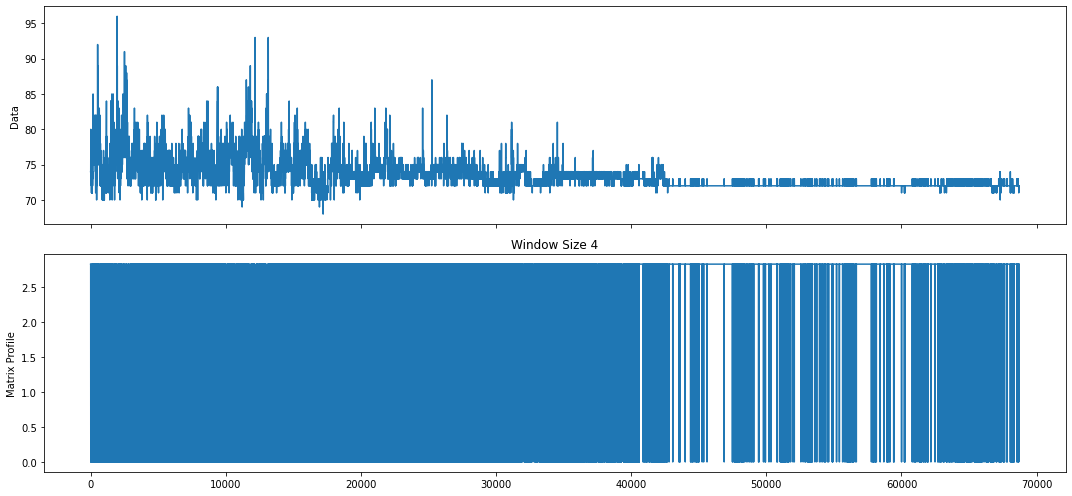

In [ ]:
regimes = mp.discover.regimes(profile,2)
mp.visualize(regimes)

In [ ]:
regimes['regimes']

array([    4, 42475])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


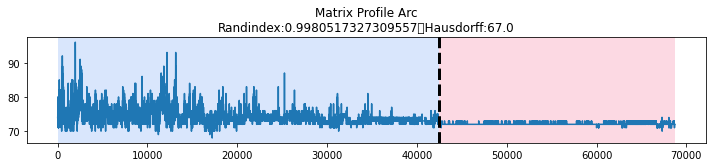

In [ ]:
rpt.display(df_down['RSSI'].values, df_down_bps,[regimes['regimes'][-1],42475])

v1= randindex(df_down_bps, [regimes['regimes'][-1],len(df_down['RSSI'].values)])
v2= hausdorff(df_down_bps, [regimes['regimes'][-1],len(df_down['RSSI'].values)])

plt.title(f'Matrix Profile Arc\nRandindex:{v1}\tHausdorff:{v2}')


plt.show()

# Rupture 

It seems has many implementation for segmentation 
pip install ruptures

https://pypi.org/project/ruptures/


In [ ]:
import matplotlib.pyplot as plt
import ruptures as rpt
from ruptures.metrics import randindex,hausdorff
import matplotlib.pylab as plt
import numpy as np

def segmentation(X,bps,search=rpt.Binseg,model='l2',n_bkps=1): 
    if search==rpt.KernelCPD:
        algo = search(kernel=model).fit(X)
    else:
        algo = search(model=model).fit(X)
    result = algo.predict(n_bkps=n_bkps)#pen=np.log(len(X)) * 1 * np.std(X)**2)#n_bkps=1)

    v1= randindex(bps, result)
    v2= hausdorff(bps, result)

    # display
    rpt.display(X, bps, result)
    plt.title(f'{str(search.__name__)}-{model}\nRandindex:{v1}\tHausdorff:{v2}')
    plt.show()

X = df_down['RSSI'].values.reshape(-1,1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


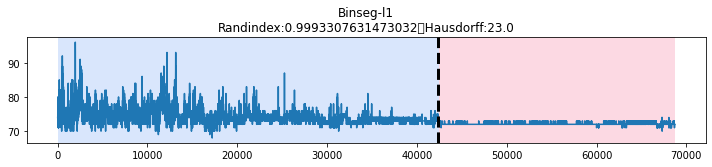

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


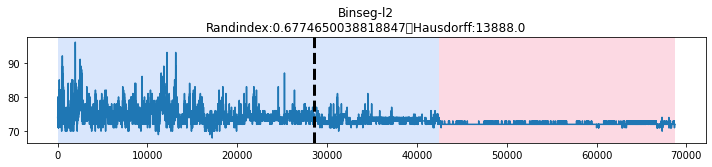

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


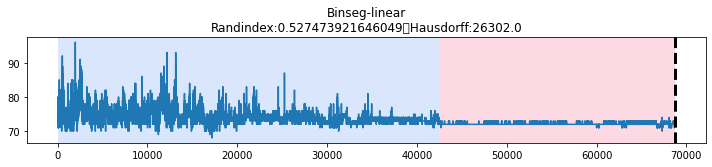

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


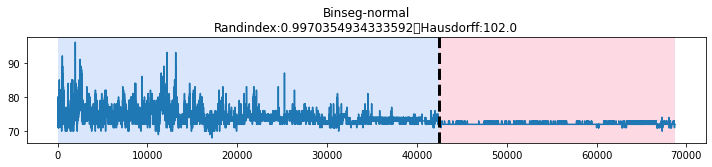

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


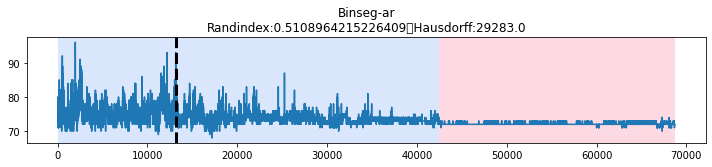

In [ ]:
segmentation(X,df_down_bps,search=rpt.Binseg,model='l1',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.Binseg,model='l2',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.Binseg,model='linear',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.Binseg,model='normal',n_bkps=1) 
segmentation(X,df_down_bps,search=rpt.Binseg,model='ar',n_bkps=1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


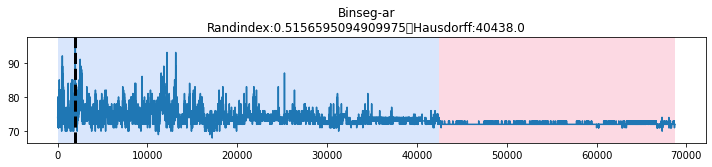

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


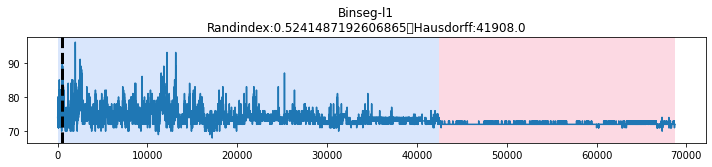

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


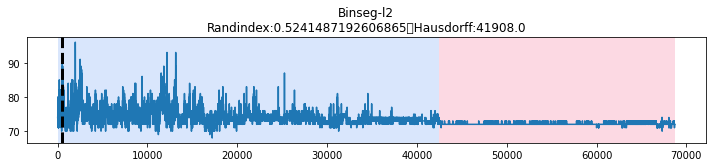

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


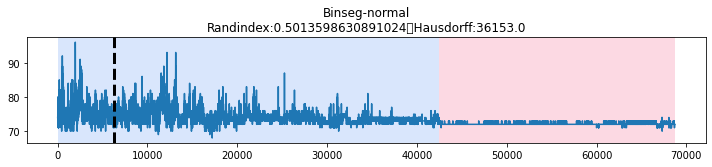

In [ ]:
segmentation(X,df_down_bps,search=rpt.Window,model='ar',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.Window,model='l1',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.Window,model='l2',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.Window,model='normal',n_bkps=1) 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


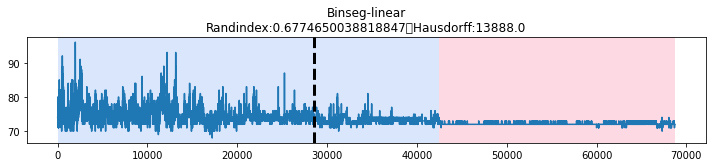

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


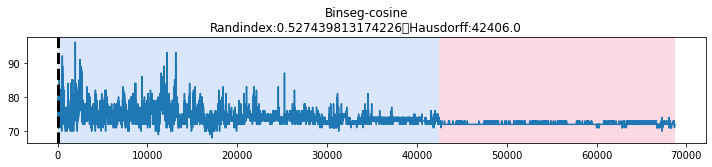

In [ ]:
segmentation(X,df_down_bps,search=rpt.KernelCPD,model='linear',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.KernelCPD,model='cosine',n_bkps=1) 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


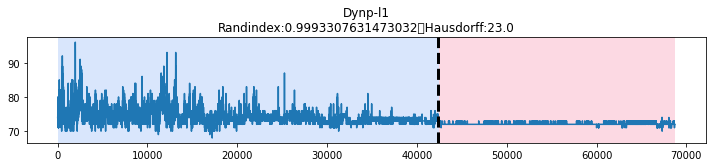

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


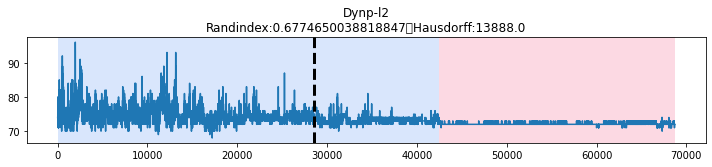

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


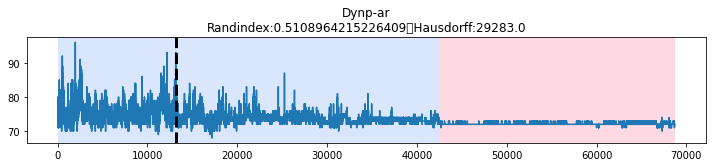

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


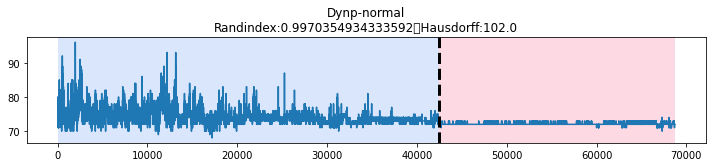

In [ ]:
segmentation(X,df_down_bps,search=rpt.Dynp,model='l1',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.Dynp,model='l2',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.Dynp,model='ar',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.Dynp,model='normal',n_bkps=1) 


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


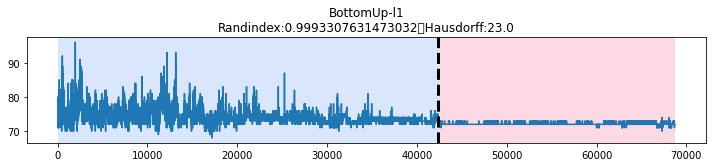

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


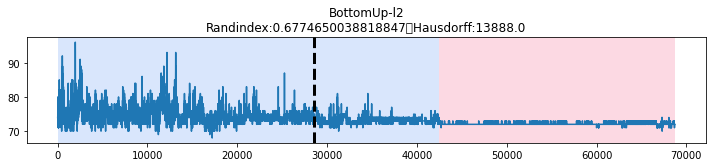

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


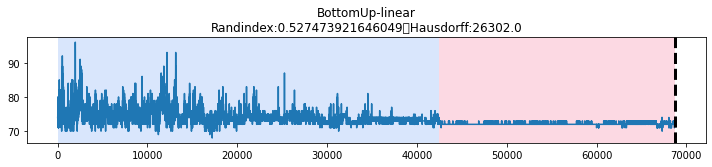

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


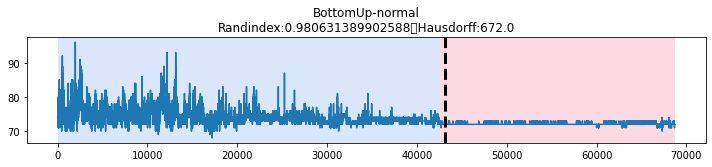

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


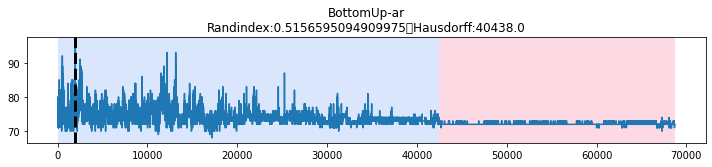

In [ ]:
segmentation(X,df_down_bps,search=rpt.BottomUp ,model='l1',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.BottomUp ,model='l2',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.BottomUp ,model='linear',n_bkps=1)
segmentation(X,df_down_bps,search=rpt.BottomUp ,model='normal',n_bkps=1) 
segmentation(X,df_down_bps,search=rpt.BottomUp ,model='ar',n_bkps=1)